# Insurance Cost Project - Codecademy Machine Learning and Data Science
***

### 1.0 Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub


### 1.1 Import Data: [Kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance)

In [2]:
from kagglehub import KaggleDatasetAdapter

""" IMPORT DATA FROM KAGGLE USING KAGGLEHUB API
file_path = "insurance.csv"
df_insurance = kagglehub.dataset_load(KaggleDatasetAdapter.PANDAS, "mirichoi0218/insurance", file_path)
df_insurance.to_csv("local_insurance.csv", index=False)
"""
insurance_df = pd.read_csv("local_insurance.csv")

print("\nHead\n",insurance_df.head())
print("\nShape\n",insurance_df.shape)
print("\nInfo\n",insurance_df.info())
print("\nDescribe\n",insurance_df.describe())
print("\nColumns\n",insurance_df.columns)



Head
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Shape
 (1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Info
 None

Describe
                age          bmi     children    

### 1.2 Data Preprocessing

In [3]:
# Feature Analysis

# Searching for nulls
null_sum = insurance_df.isnull().sum().sum()
null_is_one = null_sum == 1
print(f"There {'is' if null_is_one else 'are'} {null_sum} null value{'' if null_is_one else 's'} in the dataset!\n")

# Categorical features distrobution
print(insurance_df.describe(include=['object']))

# Male to Female ratio - Balanced Dataset?
total_count = insurance_df.shape[0]
male_count = insurance_df['sex'].value_counts().iloc[0]
female_count = insurance_df.shape[0] - male_count

print(f'\n\nmale: \t{male_count}'
      f'\nfemale:\t{female_count}'
      f'\nratio:\t{male_count/total_count * 100:.0f}:'
      f'{female_count/total_count * 100:.0f}')

# Smoker to Non-smoker ratio
count_smokers = insurance_df['smoker'].value_counts().iloc[1]
count_non_smokers = insurance_df.shape[0] - count_smokers

print(f'\n\nsmoker:\t\t{count_smokers}'
      f'\nnon-smoker:\t{count_non_smokers}'
      f'\nratio:\t\t{count_smokers/total_count * 100:.0f}:'
      f'{count_non_smokers/total_count * 100:.0f}')

# Region distrobution
region_values = insurance_df['region'].value_counts()
se = region_values.iloc[0]
sw = region_values.iloc[1]
nw = region_values.iloc[2]
ne = region_values.iloc[3]

print(f'\nRegion Distribution \n(NW : NE : SE : SW)'
      f'\n {nw/total_count*100:.0f} : {ne/total_count*100:.0f} : '
      f'{se/total_count*100:.0f} : {sw/total_count*100:.0f}')


There are 0 null values in the dataset!

         sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364


male: 	676
female:	662
ratio:	51:49


smoker:		274
non-smoker:	1064
ratio:		20:80

Region Distribution 
(NW : NE : SE : SW)
 24 : 24 : 27 : 24


### 1.3 Column Variable Assignment

AVERAGE MALE COST: 13956.75
AVERAGE FEMALE COST: 12569.58


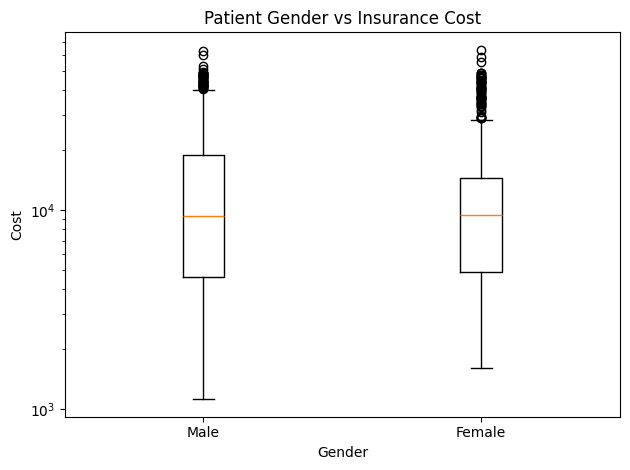



smokers:		274
non_smokers:	1064

Average Smoker Insurance Cost: 32050.23
Average Non-Smoker Insurance Cost: 8434.27


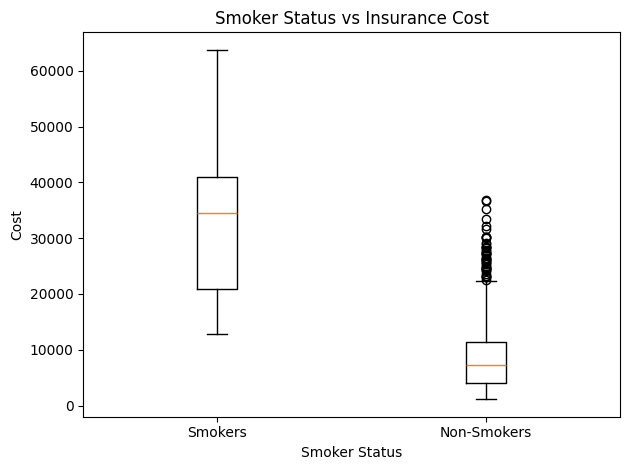

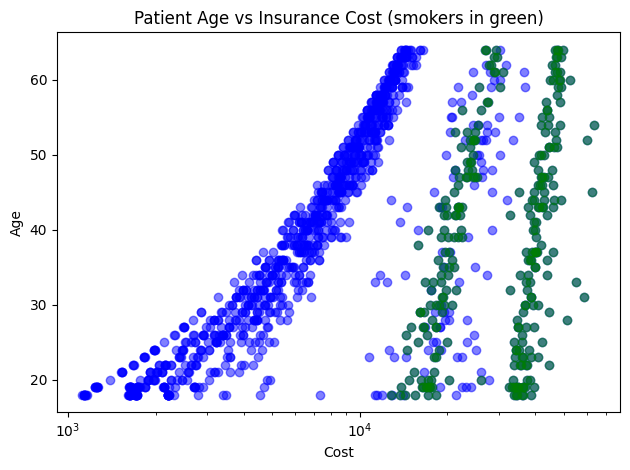

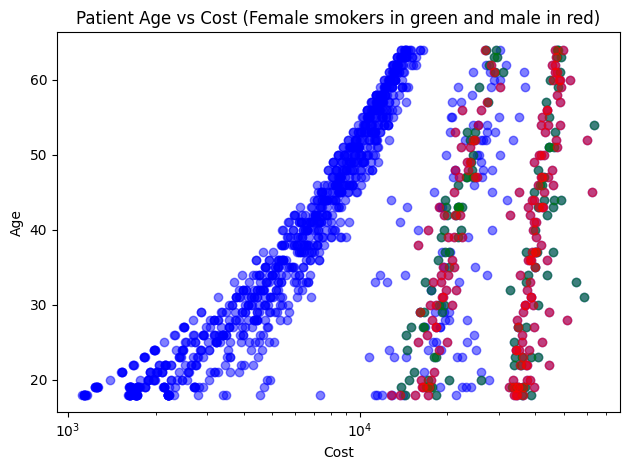

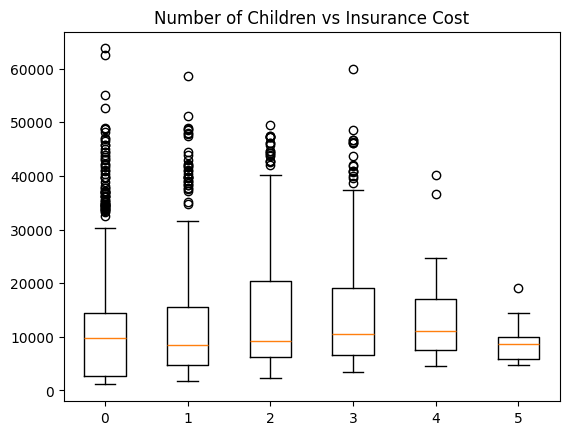

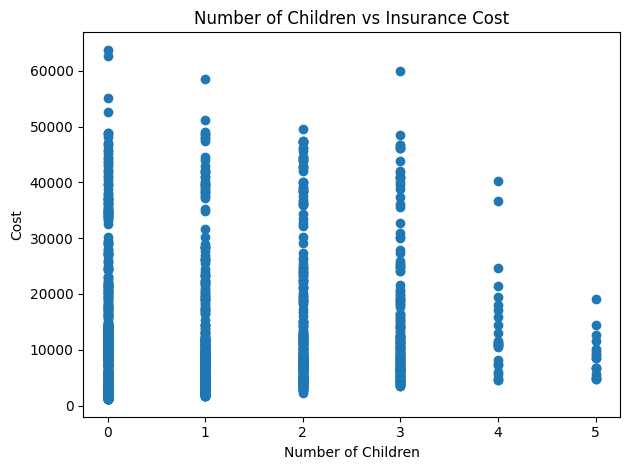

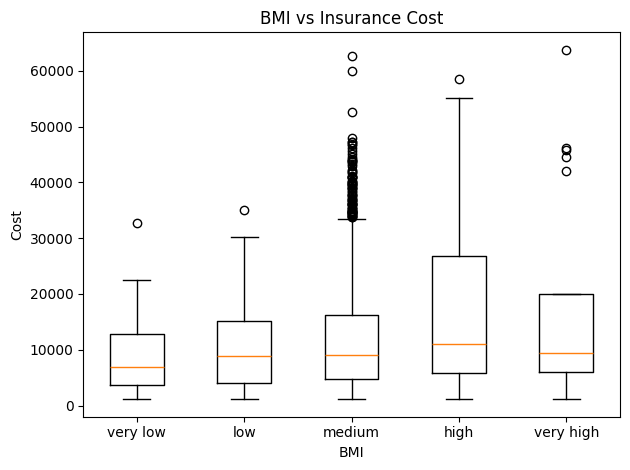

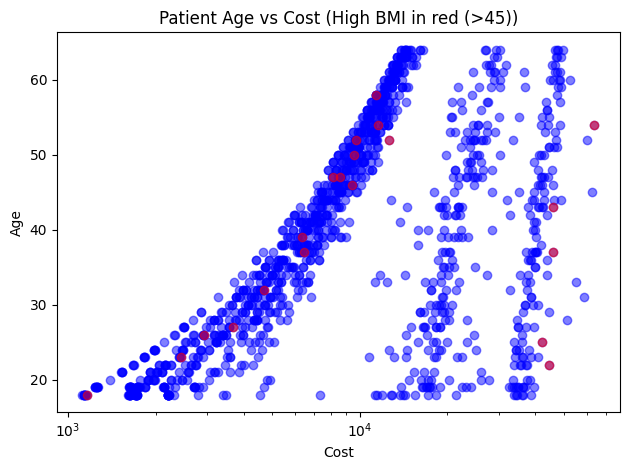

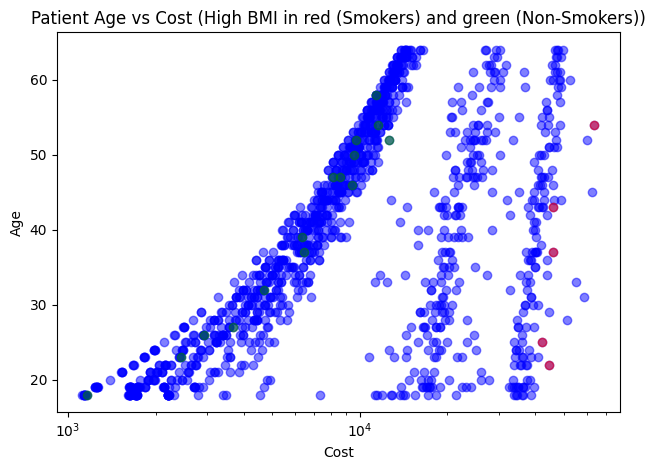

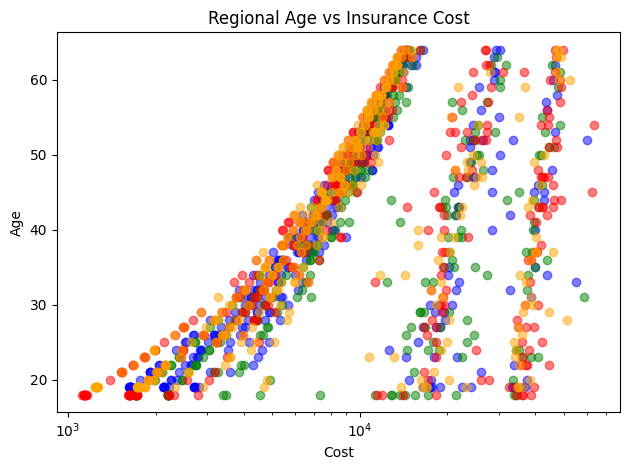

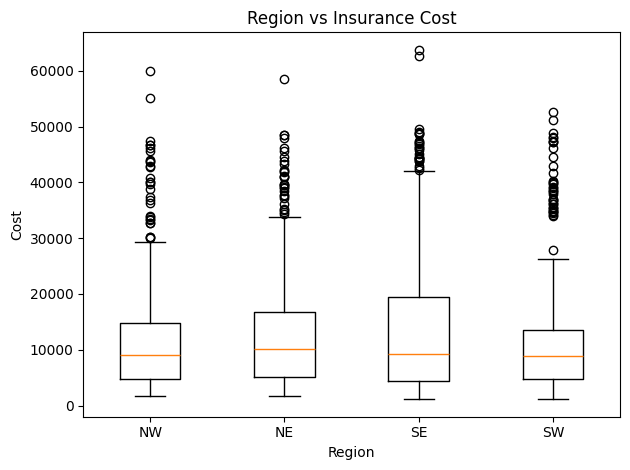

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


<Figure size 640x480 with 0 Axes>

In [4]:
# Assign Columns to variables for visualizing data
cost = insurance_df['charges']
age = insurance_df['age']
bmi = insurance_df['bmi']
smoker = insurance_df['smoker']
sex = insurance_df['sex']
region = insurance_df['region']
children = insurance_df['children']


male_df = insurance_df.iloc[insurance_df[insurance_df['sex'] == 'male'].index]
female_df = insurance_df.iloc[insurance_df[insurance_df['sex'] == 'female'].index]
male_cost = male_df['charges']
female_cost = female_df['charges']
male_age = male_df['age']
female_age = female_df['age']

print(f'AVERAGE MALE COST: {male_cost.mean():.2f}\nAVERAGE FEMALE COST: {female_cost.mean():.2f}')

plt.title('Patient Gender vs Insurance Cost')
plt.boxplot([male_cost,female_cost], showmeans=False,tick_labels=['Male','Female'])
plt.xlabel('Gender')
plt.ylabel('Cost')
plt.yscale('log')
plt.tight_layout()
plt.show()
plt.clf()

# Insurance Cost for Smokers vs Non-smokers:
non_smokers_cost = 0
smokers_cost = 0
smokers_index = []
non_smoker_index = []
female_smoker_index = []
male_smoker_index = []
for i in range(insurance_df.shape[0]):
    if smoker.loc[i] == 'yes':
        smokers_cost += cost.loc[i]
        smokers_index.append(i)
        if sex.iloc[i] == 'female':
            female_smoker_index.append(i)
        elif sex.iloc[i] == 'male':
            male_smoker_index.append(i)

    elif smoker.loc[i] == 'no':
        non_smokers_cost += cost.loc[i]
        non_smoker_index.append(i)
    else:
        continue

count_smokers = smoker.value_counts().iloc[1]
count_non_smokers = smoker.value_counts().iloc[0]

print(f'\n\nsmokers:\t\t{count_smokers}\nnon_smokers:\t{count_non_smokers}')
print(f'\nAverage Smoker Insurance Cost: {smokers_cost/count_smokers:.2f}'
      f'\nAverage Non-Smoker Insurance Cost: {non_smokers_cost/count_non_smokers:.2f}')

smoker_df = insurance_df.iloc[smokers_index]
non_smoker_df = insurance_df.iloc[non_smoker_index]

# Visualize data
plt.title('Smoker Status vs Insurance Cost')
plt.boxplot([smoker_df['charges'],non_smoker_df['charges']], showmeans=False,tick_labels=['Smokers','Non-Smokers'])
plt.xlabel('Smoker Status')
plt.ylabel('Cost')
plt.tight_layout()
plt.show()
plt.clf()


smoker_age = smoker_df['age']
smoker_cost = smoker_df['charges']

plt.title('Patient Age vs Insurance Cost (smokers in green)')
plt.scatter(cost,age, alpha=0.5, color='blue')
plt.scatter(smoker_cost,smoker_age, alpha=0.5, color='green')
plt.xlabel('Cost')
plt.ylabel('Age')
plt.xscale('log')
plt.tight_layout()
plt.show()
plt.clf()


female_smoker_age = smoker_age.loc[female_smoker_index]
male_smoker_age = smoker_age.loc[male_smoker_index]
female_smoker_cost = smoker_cost.loc[female_smoker_index]
male_smoker_cost = smoker_cost.loc[male_smoker_index]

plt.title('Patient Age vs Cost (Female smokers in green and male in red)')
plt.scatter(cost,age, alpha=0.5, color='blue')
plt.scatter(female_smoker_cost,female_smoker_age, alpha=0.5, color='green')
plt.scatter(male_smoker_cost,male_smoker_age, alpha=0.5, color='red')
plt.xlabel('Cost')
plt.ylabel('Age')
plt.xscale('log')
plt.tight_layout()
plt.show()
plt.clf()


children_df = pd.DataFrame({'children':children, 'cost':cost})
# Just smokers with children
# children_df = children_df.iloc[smokers_index]
boxplot_data = [children_df[children_df['children'] == i]['cost'] for i in range(6)]

plt.title('Number of Children vs Insurance Cost')
plt.boxplot(boxplot_data, showmeans=False,tick_labels=[str(i) for i in range(6)])
plt.show()
plt.tight_layout()
plt.clf()

plt.title('Number of Children vs Insurance Cost')
plt.plot(children_df['children'],children_df['cost'], 'o')
plt.xlabel('Number of Children')
plt.ylabel('Cost')
plt.tight_layout()
plt.show()
plt.clf()


# Consider BMI of smokers, perhaps that is what differentiates the two tiers??
bmi_class = ['very low','low','medium','high','very high']
bmi_list = []
for i in range(insurance_df.shape[0]):
    if bmi.iloc[i] <= 20:
        bmi_list.append('very low')
    if 20 < bmi.iloc[i] <= 25:
        bmi_list.append('low')
    if 25 < bmi.iloc[i] <= 35:
        bmi_list.append('medium')
    if 35 < bmi.iloc[i] <= 45:
        bmi_list.append('high')
    if 45 < bmi.iloc[i]:
        bmi_list.append('very high')

bmi_df = pd.DataFrame({'bmi':bmi_list, 'cost':cost})
boxplot_data = [bmi_df[bmi_df['bmi'] == i]['cost'] for i in bmi_class]

plt.title('BMI vs Insurance Cost')
plt.boxplot(boxplot_data, showmeans=False,tick_labels=bmi_class)
plt.xlabel('BMI')
plt.ylabel('Cost')
plt.tight_layout()
plt.show()
plt.clf()


high_bmi_index = bmi_df[bmi_df['bmi'] == 'very high'].index
high_bmi = bmi.iloc[high_bmi_index]
high_bmi_cost = cost.iloc[high_bmi_index]
high_bmi_age = age.iloc[high_bmi_index]

plt.title('Patient Age vs Cost (High BMI in red (>45))')
plt.scatter(cost,age, alpha=0.5, color='blue')
plt.scatter(high_bmi_cost,high_bmi_age, alpha=0.5, color='red')
plt.xlabel('Cost')
plt.ylabel('Age')
plt.xscale('log')
plt.tight_layout()
plt.show()
plt.clf()


bmi_df_smoker = insurance_df.iloc[smokers_index]
high_bmi_smoker = bmi_df_smoker[bmi_df_smoker['bmi'] >= 45]
bmi_df_non_smoker = insurance_df.iloc[non_smoker_index]
high_bmi_non_smoker = bmi_df_non_smoker[bmi_df_non_smoker['bmi'] >= 45]

hbs_cost = high_bmi_smoker['charges']
hbn_cost = high_bmi_non_smoker['charges']
hbs_age = high_bmi_smoker['age']
hbn_age = high_bmi_non_smoker['age']

plt.title('Patient Age vs Cost (High BMI in red (Smokers) and green (Non-Smokers))')
plt.scatter(cost,age, alpha=0.5, color='blue')
plt.scatter(hbs_cost,hbs_age, alpha=0.5, color='red')
plt.scatter(hbn_cost,hbn_age, alpha=0.5, color='green')
plt.xlabel('Cost')
plt.ylabel('Age')
plt.xscale('log')
plt.tight_layout()
plt.show()
plt.clf()

#Consider the effects of region:
region_class = ['northwest','northeast','southeast','southwest']
region_class_ab = ['NW','NE','SE','SW']

nw_index = region[region == 'northwest'].index
ne_index = region[region == 'northeast'].index
se_index = region[region == 'southeast'].index
sw_index = region[region == 'southwest'].index

nw_cost = cost.iloc[nw_index]
ne_cost = cost.iloc[ne_index]
se_cost = cost.iloc[se_index]
sw_cost = cost.iloc[sw_index]

nw_age = age.iloc[nw_index]
ne_age = age.iloc[ne_index]
se_age = age.iloc[se_index]
sw_age = age.iloc[sw_index]

plt.title('Regional Age vs Insurance Cost')
plt.scatter(nw_cost,nw_age, alpha=0.5, color='blue')
plt.scatter(ne_cost,ne_age, alpha=0.5, color='green')
plt.scatter(se_cost,se_age, alpha=0.5, color='red')
plt.scatter(sw_cost,sw_age, alpha=0.5, color='orange')
plt.xlabel('Cost')
plt.ylabel('Age')
plt.xscale('log')
plt.tight_layout()
plt.show()
plt.clf()

region_df = pd.DataFrame({'region':region, 'cost':cost})
boxplot_data = [region_df[region_df['region'] == i]['cost'] for i in region_class]

plt.title('Region vs Insurance Cost')
plt.boxplot(boxplot_data, showmeans=False,tick_labels=region_class_ab)
plt.xlabel('Region')
plt.ylabel('Cost')
plt.tight_layout()
plt.show()
plt.clf()


# Returns index of highest value. Handy to have.
# idx_max = bmi.idxmax()
print(insurance_df.columns)


***
####
#### Summary of Initial Findings:
1. Smoker status has the largest impact on patient insurance cost. There appears to be two categories of elevated cost for smokers. Gender and BMI do not appear to be the differentiating factors for Smokers.
2. Age has a linear relationship with insurance cost.
3. Region may have an affect, the southeastern region has the greatest variance and highest median cost. Perhaps population ethnicity or race are factors, or maybe there is a higher average number of Smokers amongst this population.
4. Gender appears to have little impact on overall cost, the dataset is balanced as well with near 50:50 male and female.
5. Number of children has little impact on overall cost, the population with 5 children is so low that the lower average and variance can be accounted for with the lower population of smokers among that group.
###
***

### 2.0 Data preparation: Categorical Variables, Strings, Nulls

In [5]:
# Sex, Region, and Smoker need to be converted into categorical/numeric features
# NOTE: astype() assigns values alphabetically
# female (0) and male (1)
insurance_df['sex'] = insurance_df['sex'].astype('category').cat.codes
# non_smoker (0) and smoker (1)
insurance_df['smoker'] = insurance_df['smoker'].astype('category').cat.codes
# northeast (0), northwest (1), southeast (2), southwest (3)
insurance_df['region'] = insurance_df['region'].astype('category').cat.codes
print(insurance_df.head())


   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


### 2.0 Preparing Regressive Models for Insurance Cost Prediction

In [6]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

rs = 0
X = insurance_df.drop(['charges'], axis=1)
y = insurance_df['charges']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=rs)

# Verify the random state has an appropriate distrobution of Smokers between test and train set.
# Smokers is an important feature so this is paramount to good modeling.
train_smoker_ratio = X_train['smoker'].value_counts().loc[1]/X_train.shape[0]
print(f'Training set Smoker percentage: {train_smoker_ratio * 100:.2f}%')
test_smoker_ratio = X_test['smoker'].value_counts().loc[1]/X_test.shape[0]
print(f'Testing set Smoker percentage: {test_smoker_ratio * 100:.2f}%')

""" FOLLOWING analysis of smoker distrobution, current split will utilize random_state=0.
for i in range(0,50):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=i)
    train_smoker_ratio = X_train['smoker'].value_counts().loc['yes']/X_train.shape[0]
    test_smoker_ratio = X_test['smoker'].value_counts().loc['yes']/X_test.shape[0]
    delta_smoker_ratio = abs(train_smoker_ratio - test_smoker_ratio)
    print(f'{i} {'Go for it!' if delta_smoker_ratio < 0.01 else "Don't do it!"}')
"""
print(f'Random State: {rs}')

Training set Smoker percentage: 20.47%
Testing set Smoker percentage: 20.52%
Random State: 0


### 2.1 Lasso:

Lasso fit: 0.80
Lasso mean squared error: 31846381.32
Lasso scaled fit: 0.80
Lasso scaled mean squared error: 31846453.17
Lasso all scaled fit: 0.80
Lasso all scaled mean squared error: 31846263.14
           Coefficient
age        3576.536367
sex         -23.886784
bmi        2030.591856
children    536.756707
smoker    23568.233654
region     -288.415582
Coefficient    2030.591856
Name: bmi, dtype: float64
Coefficient    23568.233654
Name: smoker, dtype: float64


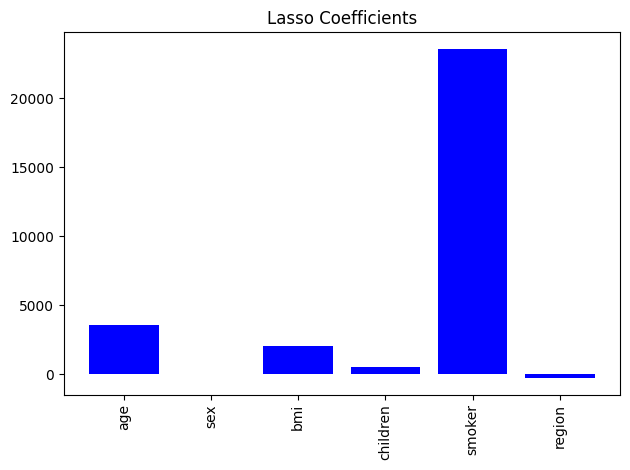

<Figure size 640x480 with 0 Axes>

In [7]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# NO SCALE
regr = Lasso(alpha=0.1)
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
print(f'Lasso fit: {regr.score(X_test,y_test):.2f}')
print(f'Lasso mean squared error: {mean_squared_error(y_test,y_pred):.2f}')

# SCALE ONLY CONTINUOUS FEATURES
continuous_features = ['age','bmi','children']
regr_scaled = Lasso(alpha=0.1)
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test_scaled[continuous_features] = scaler.transform(X_test[continuous_features])

regr_scaled.fit(X_train_scaled,y_train)
y_pred_scaled = regr_scaled.predict(X_test_scaled)
print(f'Lasso scaled fit: {regr_scaled.score(X_test_scaled,y_test):.2f}')
print(f'Lasso scaled mean squared error: {mean_squared_error(y_test,y_pred_scaled):.2f}')

# SCALE ALL FEATURES
regr_all_scaled = Lasso(alpha=0.1)
X_train_all_scaled = scaler.fit_transform(X_train)
X_test_all_scaled = scaler.transform(X_test)
regr_all_scaled.fit(X_train_all_scaled,y_train)
print(f'Lasso all scaled fit: {regr_all_scaled.score(X_test_all_scaled,y_test):.2f}')
print(f'Lasso all scaled mean squared error: {mean_squared_error(y_test,regr_all_scaled.predict(X_test_all_scaled)):.2f}')


# As expected SMOKING is the most impactful feature.
coefs = pd.DataFrame(regr_scaled.coef_, index=X_train.columns, columns=['Coefficient'])
print(coefs)
print(coefs.loc['bmi'])
print(coefs.loc['smoker'])

plt.title('Lasso Coefficients')
plt.bar(coefs.index,coefs['Coefficient'],color='blue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
plt.clf()


### 2.2 Linear Regression:

In [8]:
regr = LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
print(f'Linear fit: {regr.score(X_test,y_test):.2f}')
print(f'Linear mean squared error: {mean_squared_error(y_test,y_pred):.2f}')

regr_scaled = LinearRegression()
regr_scaled.fit(X_train_scaled,y_train)
y_pred_scaled = regr_scaled.predict(X_test_scaled)
print(f'Linear scaled fit: {regr_scaled.score(X_test_scaled,y_test):.2f}')
print(f'Linear scaled mean squared error: {mean_squared_error(y_test,y_pred_scaled):.2f}')


Linear fit: 0.80
Linear mean squared error: 31845929.13
Linear scaled fit: 0.80
Linear scaled mean squared error: 31845929.13


### 2.3 Elastic Net:

In [9]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet(alpha=0.01,l1_ratio=0.8)
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
print(f'Elastic Net fit: {regr.score(X_test,y_test):.2f}')
print(f'Elastic Net mean squared error: {mean_squared_error(y_test,y_pred):.2f}')

regr_scaled = ElasticNet(alpha=0.01,l1_ratio=0.8)
regr_scaled.fit(X_train_scaled,y_train)
y_pred_scaled = regr_scaled.predict(X_test_scaled)
print(f'Elastic Net scaled fit: {regr_scaled.score(X_test_scaled,y_test):.2f}')
print(f'Elastic Net scaled mean squared error: {mean_squared_error(y_test,y_pred_scaled):.2f}')


Elastic Net fit: 0.80
Elastic Net mean squared error: 31974939.49
Elastic Net scaled fit: 0.80
Elastic Net scaled mean squared error: 31979825.52


## Consider separating Smokers and Non-smokers into entirely separate models!
***
#### Thus far, only 80% accuracy with rs=0
#### Maybe a good place to find inspiration: [Kaggle Insp](https://www.kaggle.com/code/eliasgath/insuarance)

In [10]:
# Further EDA
# REMINDER -->
# sex:(male(1) female(0))
# smoker:(yes(1) no(0))
# regions:(ne(0) nw(1) se(2) sw(3))

# Subclass population of Non-smokers, < 40 yo, and cost > 10000 ---> WHY
ins_df = insurance_df.copy()
total_population = ins_df.shape[0]
print(f'Total population: {total_population}')
print(ins_df.head())

ins_df = ins_df.loc[ins_df['age'] < 40]
#print(ins_df.head())

ins_df = ins_df.loc[ins_df['charges'] > 10000]
#print(ins_df.head())

ins_df = ins_df.loc[ins_df['smoker'] == 0]
print(ins_df.head())

age = ins_df['age']
charges = ins_df['charges']
"""
num_features = ['age','bmi','children']
for num_feature in num_features:
    plt.title(f'{num_feature} vs Insurance Cost')
    plt.scatter(ins_df[num_feature], charges, alpha=0.5,color='blue')
    plt.ylabel('Cost')
    plt.xlabel(num_feature)
#    plt.yscale('log')
    plt.tight_layout()
    plt.show()
"""
# AS SHOWN, THIS SUB POPULATION IS NOT PREDICTABLE
subclass_size = ins_df.shape[0]
subclass_index = ins_df.index
print(f'Subclass size: {subclass_size}\nRatio of subclass to total population: {subclass_size/total_population * 100:.2f}%')

# TRIALING REMOVAL OF SUBCLASS
ins_good_df = insurance_df.copy()

good_index = list(set(list(ins_good_df.index)) - set(list(ins_df.index)))

ins_good_df = ins_good_df.iloc[good_index]
print(ins_good_df.shape)

Total population: 1338
   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520
     age  sex     bmi  children  smoker  region      charges
3     33    1  22.705         0       0       1  21984.47061
102   18    0  30.115         0       0       0  21344.84670
140   34    1  22.420         2       0       0  27375.90478
143   29    1  29.735         2       0       1  18157.87600
219   24    0  23.210         0       0       2  25081.76784
Subclass size: 48
Ratio of subclass to total population: 3.59%
(1290, 7)


### Fitting with RandomForestRegressor - Total Pop

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

X = insurance_df.drop(['charges'], axis=1)
y = insurance_df['charges']
rs = 0
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=rs)

#USING STANDARDSCALER:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('TOTAL POPULATION RESULTS:')

reg = LinearRegression()
reg.fit(X_train_scaled,y_train)
y_pred = reg.predict(X_test_scaled)
print(f'\nLinear (std scale) fit: {reg.score(X_test_scaled,y_test):.4f}'
      f'\t\tMSE: {mean_squared_error(y_test,y_pred) / 1000000:.2f} Million')

reg_rfr = RandomForestRegressor(random_state=rs)
reg_rfr.fit(X_train_scaled,y_train)
y_pred = reg_rfr.predict(X_test_scaled)
print(f'Random Forest (std scale) fit: {reg_rfr.score(X_test_scaled,y_test):.4f}'
      f'\t\tMSE: {mean_squared_error(y_test,y_pred) / 1000000:.2f} Million')


# USING MINMAXSCALER:
scaler_mm = MinMaxScaler()
X_train_mm = scaler_mm.fit_transform(X_train)
X_test_mm = scaler_mm.transform(X_test)

reg.fit(X_train_mm,y_train)
y_pred = reg.predict(X_test_mm)
print(f'\nLinear (minmax scale) fit: {reg.score(X_test_mm,y_test):.4f}'
      f'\t\tMSE: {mean_squared_error(y_test,y_pred) / 1000000:.2f} Million')

reg_rfr.fit(X_train_mm,y_train)
y_pred = reg_rfr.predict(X_test_mm)
print(f'Random Forest (minmax scale) fit: {reg_rfr.score(X_test_mm,y_test):.4f}'
      f'\t\tMSE: {mean_squared_error(y_test,y_pred) / 1000000:.2f} Million')



TOTAL POPULATION RESULTS:

Linear (std scale) fit: 0.7999		MSE: 31.85 Million
Random Forest (std scale) fit: 0.8697		MSE: 20.73 Million

Linear (minmax scale) fit: 0.7999		MSE: 31.85 Million
Random Forest (minmax scale) fit: 0.8705		MSE: 20.60 Million


### Fitting with RandomForestRegressor - No Subclass

In [14]:
# Fitting linear models to compare before and after subclass offload

X = ins_good_df.drop(['charges'], axis=1)
y = ins_good_df['charges']
rs = 0
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=rs)

# USING STANDARDSCALER:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('SUBCLASS REMOVED FROM POPULATION RESULTS:')
reg = LinearRegression()
reg.fit(X_train_scaled,y_train)
y_pred = reg.predict(X_test_scaled)
print(f'\nLinear fit: {reg.score(X_test_scaled,y_test):.4f}'
      f'\t\tMSE: {mean_squared_error(y_test,y_pred) / 1000000:.2f} Million')

reg_rfr = RandomForestRegressor(random_state=rs)
reg_rfr.fit(X_train_scaled,y_train)
y_pred = reg_rfr.predict(X_test_scaled)
print(f'Random Forest fit: {reg_rfr.score(X_test_scaled,y_test):.4f}'
      f'\t\tMSE: {mean_squared_error(y_test,y_pred) / 1000000:.2f} Million')



# USING MINMAXSCALER:
scaler = MinMaxScaler()
X_train_mm = scaler.fit_transform(X_train)
X_test_mm = scaler.transform(X_test)

reg.fit(X_train_mm,y_train)
y_pred = reg.predict(X_test_mm)
print(f'\nLinear MinMax scaled fit: {reg.score(X_test_mm,y_test):.4f}'
      f'\t\tMSE: {mean_squared_error(y_test,y_pred) / 1000000:.2f} Million')

reg_rfr.fit(X_train_mm,y_train)
y_pred = reg_rfr.predict(X_test_mm)
print(f'Random Forest MinMax scaled fit: {reg_rfr.score(X_test_mm,y_test):.4f}'
      f'\t\tMSE: {mean_squared_error(y_test,y_pred) / 1000000:.2f} Million')



SUBCLASS REMOVED FROM POPULATION RESULTS:

Linear fit: 0.7936		MSE: 30.86 Million
Random Forest fit: 0.9013		MSE: 14.77 Million

Linear MinMax scaled fit: 0.7936		MSE: 30.86 Million
Random Forest MinMax scaled fit: 0.9009		MSE: 14.81 Million
